Epoch 1/100
24/24 [==============================] - 2s 28ms/step - loss: 0.9808 - accuracy: 0.6833 - val_loss: 0.9255 - val_accuracy: 0.7667
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 0.8888 - accuracy: 0.7417 - val_loss: 0.8459 - val_accuracy: 0.8000
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.8127 - accuracy: 0.7417 - val_loss: 0.7705 - val_accuracy: 0.7667
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.7474 - accuracy: 0.7167 - val_loss: 0.7017 - val_accuracy: 0.7333
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6864 - accuracy: 0.7167 - val_loss: 0.6441 - val_accuracy: 0.7333
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6344 - accuracy: 0.7083 - val_loss: 0.5923 - val_accuracy: 0.7333
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.5910 - accuracy: 0.7000 - val_loss: 0.5508 - val_accuracy: 0.7333
Epoch 8/1

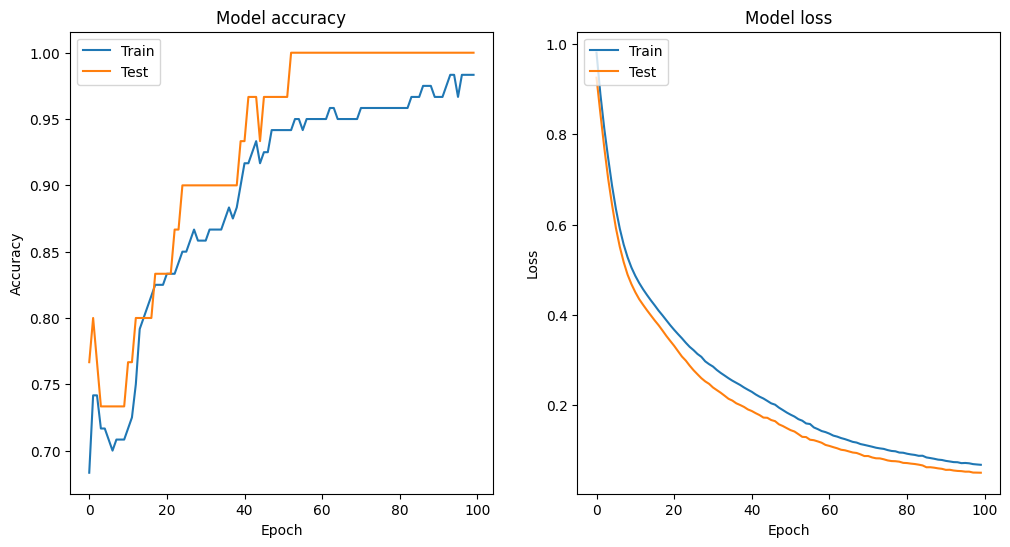

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Iris veri setini yükle
data = load_iris()
X = data.data
y = data.target

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartlaştır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Etiketleri kategorik one-hot kodlamaya çevir
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Neural network modelini oluştur
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Modeli derle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))

# Modeli değerlendir
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Eğitim ve doğrulama doğruluk değerlerini çiz
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Eğitim ve doğrulama kayıp değerlerini çiz
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()